#### Setups required
Before starting, the following code sets the alignment of all tables created in the notebook to align on the left of the cell.

In [22]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Assessment 1:
## Get the square root of 2 and display to 100 decimal places

### Requirements:

Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library1 or otherwise. You should research the task first and include references and a description of your algorithm.

### Issue

There are two issues to be resolved as part of this assignment:

    1) How to display a floating point number accurately to 100 decimal places.
    2) How to calculate the square root of a number to 100 decimal places.
    
#### Display floating point number accurately to 100 decimal places

On computers, floating point numbers (numbers with a decimal place) are represented as fractions based on the base 2 (binary). In addition, the current standard for representing floating point numbers is a 64 bit system. Using the IEEE 754 standard (<a href = "http://www.cs.ucc.ie/~osullb/cs1101/notes/notes31.pdf">O'Sullivan</a>), the most common representation of the floating point number is where:

    1st digit represents the sign of the number (positive or negative).
    2nd – 12th digit represents the number before the decimal point (the exponent).
    13th – 54th digits represent the numbers after the decimal point (the fraction).

The combination of these two issues represent a problem for trying to calculate any number to a degree of accuracy if they cannot be expressed as a binary number. This results in approximation of the value, a high degree, but not perfect accuracy.

For example, 0.5$_{10}$ (0.1$_{2}$) can easily be represented as a binary number, using the above standard as:

<u><i>0011 1111 0000 0000 0000 0000 0000 0000</i></u> (O'Sullivan)

However, the number 0.1$_{10}$ cannot be represented to the same degree of accuracy. Converting 0.1$_{10}$ into base 2 results in:

<u><i>0.0001100110011001100110011001100110011001100110011</i></u> (<a href = "https://www.exploringbinary.com/why-0-point-1-does-not-exist-in-floating-point">Regan, 2012</a>)

When reconverted back into base 10, this results in a value of:

<u><i>0.1000000000000000055511151231257827021181583404541015625</i></u> (Regan, 2012)

<a href = "https://people.eecs.berkeley.edu/~wkahan/ieee754status/IEEE754.PDF">Kahan (1997)</a> notes that in a floating point number, the number of significant decimal places that can be achieved in 15 – 17 (p. 4). In the above base 10 representation, if the number were rounded to 17 decimal places, it becomes:

<u><i>0.10000000000000001</i></u> (Regan, 2012)

This implies that even though we can calculate a number to up to 50 decimal places, rounding a number to even 17 decimal places will produce a rounding error, and will not return the same number with which we started.

Dealing specifically with the square root of two, it is known that it is an irrational number (i.e. the pattern of the numbers does not repeat, unlike the pattern of 0011 in the value of 0.1($_{2}$) (<a href = "https://www.math.utah.edu/~pa/math/q1.htm">Alfeld, 1996</a>). Like above, even though the decimal output for the square root of 2 can be shown to approx. 53 decimal places, the rounding issue identified will mean that after about 17 significant digits, the number produced by any method involving floating point numbers will result in inaccuracies. This can be seen in the Newton-Raphson method below.


In [23]:
import datetime as dt                                                           # Only used for calculating speed of function

def NR_method(Number):

    root = Number / 2                                                           # Set the initial root value at half of the number to be square rooted
    Count = 1                                                                   # Count of number of iterations
    precision = 10 ** (-15)                                                     # Level of precision required

    while abs(Number - root * root) > 10 ** (-15):                              # While the Number less the detrived root is less than the precision

        root = (root + Number / root) / 2                                       # Find the new root through the Newton Raphson method
        Count += 1                                                              # Increment the count by 1

    return root, Count                                                          # Return the root and Count

Time_1 = dt.datetime.now()                                                      # Time at the start of the process

Number = 2                                                                      # Number whose square root is to be determined.

NR_SQRT, Iteration = NR_method(Number)                                          # Call the NR_method function, and assign the outputs to variables NR_SQRT and Iteration

Time_2 = dt.datetime.now()                                                      # Time at the end of the process

print()
print("Newton-Raphson Method")
print("-----------------------------------------------------------")
print("Square root 2 to 100 decimal places (Newton-Raphson method): \n%.100f" % NR_SQRT)
print()
print("Steps required to run this to get to 100 decimal places: %d" % Iteration)
print()
print("Time taken to run this method:", (Time_2-Time_1))


Newton-Raphson Method
-----------------------------------------------------------
Square root 2 to 100 decimal places (Newton-Raphson method): 
1.4142135623730949234300169337075203657150268554687500000000000000000000000000000000000000000000000000

Steps required to run this to get to 100 decimal places: 6

Time taken to run this method: 0:00:00


#### Issue with the Newton-Raphson method

The calculated Newton-Raphson method diverges from the "official" NASA version after 17 decimal places, where the method returns 0949 instead of 0950. This is due to issues within Python, where floats do not generally display more than 17 decimal places, even if they hold more.

Additionally, event when the variables hold more than 17 decimal places, they cannot hold more than 50 decimal places. This results in all the digits after the 50th decimal place being printed as 0. This can be seen in the above print out, when the float was specified at 100 decimal places. This issue can be resolved by using imported libraries, which can force more decimal places to be held. However that was not allowed by the rules of the assignment.

### Option 2: Subtraction method

This method is an old Japanese method described by <a href ="http://www.afjarvis.staff.shef.ac.uk/maths/jarvisspec02.pdf"> Frazer Jarvis</a>. The method involves an involves the use of 2 variables, "A" and "B". The initial value of the variable "A" is 5n (where n is the number for which the square root is being sought). In this case "A" would be equal to 10 (5n --> 5 x 2 = 10). The variable "B" can be any number, but the most accurate (through trial and error) is 5. 

The logic behind the method is:

    + If A is greater than or equal to B, change the value of A to A - B, and add 10 to B.
    + If B is greater than A, multiply A by 100, and place a 0 in the B variable, between the penultimate and final digit.

The first 3 iterations of this method, for the square root of 2, would be:

    1) A = 10, B = 5  --> A > B  --> A = A - B = 10 - 5 = 5,  B = B + 10 = 5 + 10 = 15
    2) A = 5, B = 15  --> A < B  --> A = A x 100 = 5 x 100 = 500,  B = B[0] & "0" & B[1] = 1 & 0 & 5 = 105
    3) A = 500, B = 105  --> A > B  --> A = A - B = 500 - 105 = 395,  B = B + 10 = 105 + 10 = 115
    etc.....

In [24]:
import datetime as dt

def sub_root(a, b, Count):                                      # Create a function to import values of a and b.
    while len(str(b)) <= 102:                                   # While the string length of b is less than 101 (1 integter, plus the 101 significant decimal place).

        if a >= b:                                              # If input "a" is greater than or equal input "b".
            a = a - b                                           # Set value of "a" to be "a" minus "b".
            b = b + 10                                          # Set value of "b" to be "b" + 10.

        elif a < b:                                             # If input "a" is less than input "b".
            a = a * 100                                         # Multiply "a" by 100.
            c = len(str(b))-1                                   # Set the value "c" to be the string length of "b" minus 1.
            d = str(b)                                          # Set the value "d" to be the string "b".
            e = int(d[:c] + "0" + d[c:])                        # Set the value of "e" to be the first "c" number of characters of the string "d".
                                                                # concatenated with a "0" and finished with the last digit of the string "d".
            b = e                                               # Set the value of "b" to be the same as "e".

        Count += 1                                              # Increment count by 1

        return sub_root(a, b, Count)                            # Return the value to the function to reprocess.

    return b, Count                                             # Return the values for "b" and Count when the above while loop is completed.

Time_1 = dt.datetime.now()                                      # Time at the start of the process

Number = 2                                                      # Number whose square root is to be determined.

SQRT, Count = sub_root(Number * 5, 5, 0)                        # Call the sub_root function, and assign the outputs to variables SQRT and Count


Time_2 = dt.datetime.now()                                      # Time at the end of the process

print("Subraction method")
print("-----------------------------------------------------------")
print("Value of B is:", SQRT)
print()
print("Steps required to run this method to get to 100 decimal places: %d" % Count)
print()
print("Time taken to run this method:", (Time_2-Time_1))

Subraction method
-----------------------------------------------------------
Value of B is: 1414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572705

Steps required to run this method to get to 100 decimal places: 583

Time taken to run this method: 0:00:00.000999


Through this subtraction (and multiplication) method, the value of B becomes the square root of the value of n, without the decimal place put in the correct location. Correcting for that issue:

In [25]:
SQRT = str(SQRT)                                                # Turn the SQRT variable into a string from an integer
formatted_SQRT = f'{SQRT[0]}.{SQRT[1:101]}'                     # Set the value of "format_SQRT to be the value of "SQRT" with a decimal place after the 1st digit in the string.

print()
print("Subtraction method")
print("-----------------------------------------------------------")
print("Square root 2 to 100 decimal places:\n%s" % formatted_SQRT)


Subtraction method
-----------------------------------------------------------
Square root 2 to 100 decimal places:
1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


#### Notes on approach 2

The subraction method has an advantage over the Newton-Raphson method in that the value of B will always be greater than 0. This removes the issue, for Python, of the number of decimal places that can be calculated accurately, or displayed. In addition, by converting the number into a string, and placing a decimal place in the correct location, the method gives the impression of having been calculated by using floating point numbers, but has not been.

There are a few issues with this method:

1) The method requires the addition of a decimal place in the second position of the string. This is to convert it from 1.4E100 to 1.4..., as is the correct answer. For any number, whose square root is being sought, less than 100, there is no need to amend the code. For numbers greater than 100 there would need to be a change made in order to determine where the decimal place should go.

2) The method takes longer, in terms of iterations and time, to get to 100 decimal places than the Newton-Raphson method. A quick comparison between the two shows that it takes the Newton-Raphson method about 0.000000 seconds to run, and only requires 6 iterations of the code. The subratction method takes about 0.001 seconds to run, but requires 583 iterations of the code.

3) The function used is a recursive function. After a certain number of recursions, there is a is a risk of stack overflow due to the depth of the recursive function (tail-call). While this can be reduced or eliminated by setting the recursive depth of the stack to be higher than the default in Python, it is not ideal, and would use up considerably more processing power and storage space than the Netwon-Raphson method.

### Check on the accuracy of the two methods

##### NASA
It is important to check on the accuracy of the two methods. The quickest methof is to check the value against the known value of the square root of 2. For this we can use the value of the square root of 2, as provided by <a href="https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil">NASA</a>. As can be seen below for 100 decimal places the Newton-Raphson method, with only 17 decimals displaying accurately, is off by 2.22E-16 (1.5E-13%). The subtraction method matches perfectly to 100 decimal places.

In [26]:
# NASA calculated square root of 2

NASA = 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

Calc_SQRT = float(formatted_SQRT)

print()
print("NASA check")
print("-----------------------------------------------------------")
print()
print("Difference between NASA calcualtions and Newton-Raphson method is:\t\t", (NR_SQRT - NASA))
print("Percentage difference between NASA calcualtions and Newton-Raphson method is: \t %.20f%%" % (((NASA - NR_SQRT) / NASA) * 100))

print()
print("Difference between NASA calcualtions and the subtraction method is:\t\t", (Calc_SQRT - NASA))
print("Percentage difference between NASA calcualtions and the subtraction method is: \t %.20f%%" % (((NASA - Calc_SQRT) / NASA) * 100))


NASA check
-----------------------------------------------------------

Difference between NASA calcualtions and Newton-Raphson method is:		 -2.220446049250313e-16
Percentage difference between NASA calcualtions and Newton-Raphson method is: 	 0.00000000000001570092%

Difference between NASA calcualtions and the subtraction method is:		 0.0
Percentage difference between NASA calcualtions and the subtraction method is: 	 0.00000000000000000000%


## Final note on task 1

The issue of the (in)accuracy of floating point numbers, once they go passed the 16th/17th decimal place, can very clearly be seen by the value calculated in the Newton-Raphson method. Without the use of libraries to force the accuracy to the required level, other methods must be found. 

In this case, the calculation of the value of the square root of 2 using an ever increasing interger, which was then converted to a string resolved the issue. However, this proved to be more time consuming than the Newton-Raphson method, however it was more accurate.

An alternative method, that waas not fuly explored in Python (it was in Excel) was to set the initial value of the number to 2E200. This should have resulted in the same outcome as the subtraction method, with the need to convert to a string and introduce a decimal point. This would have taken 308 iterations (in Excel) to complete.

## Bibliography for task 1

* Alfeld, P., 1996. Why is the square root of 2 irrational?. [Online] 
Available at: https://www.math.utah.edu/~pa/math/q1.html
[Accessed 11 November 2020].


* Beceanu, M., 2003. Period of the Continued Fraction of √. [Online] 
Available at: http://web.math.princeton.edu/mathlab/jr02fall/Periodicity/mariusjp.pdf
[Accessed 11 November 2020].


* Harrington, A. N., 2020. 1.14. Decimals, Floats, and Floating Point Arithmetic. [Online] 
Available at: http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
[Accessed 11 November 2020].


* Jarvis, F., 2004/2005. Square Roots by Subtraction. Mathematical Spectrum, 37(3), pp. 119 - 122.


* Kahan, W., 1997. IEEE Standard 754 for Binary Floating-Point Arithmetic. [Online] 
Available at: https://people.eecs.berkeley.edu/~wkahan/ieee754status/IEEE754.PDF
[Accessed 11 November 2020].


* Nemiroff, R. & Bonnell, J., n.d. The Square Root of Two to 1 Million Digits. [Online] 
Available at: https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil
[Accessed 11 November 2020].


* O'Sullivan, B., n.d. http://www.cs.ucc.ie/~osullb/cs1101/notes/notes31.pdf. [Online] 
Available at: http://www.cs.ucc.ie/~osullb/cs1101/notes/notes31.pdf
[Accessed 11th November 2020].


* Python Software Foundation, 2020. 15. Floating Point Arithmetic: Issues and Limitations. [Online] 
Available at: https://docs.python.org/3/tutorial/floatingpoint.html
[Accessed 26 November 2020].


* Regan, R., 2012. Why 0.1 does not exist in floating=point. [Online] 
Available at: https://www.exploringbinary.com/why-0-point-1-does-not-exist-in-floating-point/
[Accessed 11 November 2020].

# Assessment 2:
## Calculate the Chi-squared test for independence for the given table

### Requirements
The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The <a href = “https://en.wikipedia.org/wiki/Chi-squared_test”> Wikipedia</a> article gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

||A|B|C|D|Total|
|:--|:--|:--|:--|:--|:--|
|White Collar|90|60|104|95|349|
|Blue Collar|30|50|51|20|151|
|No Collar|30|40|45|35|150|
|Total|150|150|200|150|650|

### What is Chi-Squared testing for independence?
Chi-Squared independence testing is used to determine if <i>“two categorical variables are related in some population”</i> <a href = https://www.spss-tutorials.com/chi-square-independence-test/> (Berg, 2020)</a>. It is an omnibus test, which means that it tests the data as a whole, and does not identify where the exact relationships lie <a href = https://pythonfordatascienceorg.wordpress.com/chi-square-python/> (Python for Data Science, 2020)</a>. This relationship identification would require additional testing after the Chi-Squared resting is complete. Another way of explaining Chi-Squared testing is that it is used to determine whether there is a difference between the expected distribution of a variable and the actual distribution of a variable <a href = https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b> (Huneycutt, 2018)</a>. It is often used to determine if the sample data gathered matches, or it a good fit for the population as a whole <a href = https://www.statisticshowto.com/probability-and-statistics/chi-square/> (Statistics How To, 2020)</a>. In order to use a Chi-squared test, the data should be random, mutally exclusive, and not have been processed <a href = https://www.investopedia.com/terms/c/chi-square-statistic.asp> (Hayes, 2020)</a>.

In Chi-Squared testing two hypothesis are made:

* <b><u>Null Hypothesis (H$_{0}$)</b></u> that there is no relationship between the two categorical variables.

* <b><u>Alternative Hypothesis (H$_{1}$)</b></u> that there is a relationship between the two categorical variables.

The Chi-square testing gives three values to help determine whether the null hypothesis is correct. These are:

* <b><u>Critical Value<b></u></b> is the area under a normally distributed graph, in which the test statistics are unlikely to be found for a given level of significancce <a href = https://www.itl.nist.gov/div898/handbook/prc/section1/prc131.htm> (NIST/SEMATECH, 2020)</a>.
    
* <b><u>p-value<b></u></b> tells the tester the probability that the variables being tested are independent.
    
* <b><u>Degrees of freedom</b></u> is the maximum number of values that are allowed to vary within the test sample <a href = https://www.investopedia.com/terms/d/degrees-of-freedom.asp> (Ganti, 2020)</a>. It is calculated as the number of classes there are in the sample less 1. Where there are multiple rows and columns it is the multiplication of the number of rows (less 1) times the number of columns (less 1) (e.g. for a table with 10 rows, and 8 columns, it would be (10 – 1) x (8 – 1) = 9 x 7 = 63).
    
Using these values, and a predetermined level of significance (alpha, normally 0.05, or 0.01), it is possible to determine whether the Null hypothesis should be accepted or rejected <a href = https://math.hws.edu/javamath/ryan/ChiSquare.html> (Mathbeans Project, 2020)</a>. Specifically, there are two tests that can be used <a href = “https://machinelearningmastery.com/chi-squared-test-for-machine-learning/” (Brownlee, 2018)</a>:
        
1)	<b>p-value <= alpha</b>: a significant result, the variables are dependent, and the null hypothesis can be rejected.

2)	<b>Critical value (calc) >= Critical value (expected)</b>: a significant result, the variables are dependent, and the null hypothesis can be rejected.
        
The critical value (expected) is derived from the degrees of freedom and the alpha. The Chi-squared distribution table, for up to 7 degrees of freedom, and alphas of 0.1 (10%), 0.05 (5%), and 0.01 (1%) is as follows <a href = https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf>(Nazarathy, 2020)</a>:

|Degree of Freedom / alpha|0.1|0.05|0.01|
|:--:|--|--|--|
|1|2.71|3.84|6.93|
|2|4.61|5.99|9.21|
|3|6.25|7.81|11.34|
|4|7.78|9.49|13.28|
|5|9.24|11.07|15.09|
|6|10.64|12.59|16.81|
|7|12.02|14.07|18.48|



In [27]:
# Script to determine the Chi-squared test results for the given table

from scipy import stats as st
import numpy as np

# Create the lists containing the values for each of the collars
WC = [90, 60, 104, 95]                                                  # White Collar
BC = [30, 50, 51, 20]                                                   # Blue Colloar
NC = [30, 40, 45, 35]                                                   # No Collar

# Create the contingency table
collars = np.array([WC, BC, NC])                                        # Use the lists to create a 2D array

# Return the chi squared values, probability, degrees of freedom, and expected tables
chi_sqr_stat, p_val, D_of_F, expect_t = st.chi2_contingency(collars)

print("Critical value (calculated) of the table is: %.3f" % chi_sqr_stat)
print()
print("p-value: %.6f" % p_val)
print()
print("Degrees of Freedom:", D_of_F)
print()

# Determine the Critical stat value at two levels of probability

probability_1 = 0.05                                                    # Set probability value 1 to 5%
probability_2 = 0.01                                                    # Set probability value 2 to 1%

critical_stat_1 = st.chi2.ppf(1-probability_1, D_of_F)                  # Calculate the test_stats for 6 degrees of freedom, and 95% confidence
critical_stat_2 = st.chi2.ppf(1-probability_2, D_of_F)                  # Calculate the test_stats for 6 degrees of freedom, and 99% confidence

print("For the degrees of freedom calculated for the table, the expected critical values are:")
print("At %.0f degrees of freedom and a alpha of %d%%, the critical value is %.3f." % (D_of_F, (probability_1 * 100), critical_stat_1))
print("At %.0f degrees of freedom and a alpha of %d%%, the critical value is %.3f." % (D_of_F, (probability_2 * 100), critical_stat_2))

Critical value (calculated) of the table is: 24.571

p-value: 0.000410

Degrees of Freedom: 6

For the degrees of freedom calculated for the table, the expected critical values are:
At 6 degrees of freedom and a alpha of 5%, the critical value is 12.592.
At 6 degrees of freedom and a alpha of 1%, the critical value is 16.812.


### What does this mean?

1) <b><u>p-value</b></u>: The p-value calculated for the contingency table is 0.000410 (or 0.041%). This value is significantly below both alpha values of 0.05 (5%) and 0.01 (1%), it would suggest that the likelihood of getting such results randomly is extremely unlikely if the null hypothesis is correct. 
   
2) <b><u>Degrees of Freedom</b></u>: The calculated degrees of freedom is 6, which is the same as the degrees of freedom on the source page.

3) <b><u>Critical stat value</b></u>: The critical stat  values (calculated) is calculated as 24.571, and is given as 24.6 on the Wikipedia page. These results are the same, if the values are rounded to only 1 significant decimal. However, as noted above the critical stat values for 6 degrees of freedom, and the alpha values of 0.05 and 0.01, are 12.592, and 16.812 respectively. Given that the calculated value is significantly higher than the expected values, it would suggest that the null hypothesis is not valid.

### Overall

As per the assignment, the calculated critical stats value was found to be the same as the given value (24.571 / 24.6, as per point 3 above). In addition the p-value that was requested is 0.000410 (as per point 1 above).

The overall result of the Chi-squared testing suggests that the null hypothesis (*"that each person's neighborhood of residence is independent of the person's occupational classification"*) should be rejected, due to a p-value significantly lower than the alpha values, and a critical stat value (calculated) is considerably higher than the Chi-squared distribution tables would allow. As such, the alternative hypothesis *that each person's neighbourhood of residence is dependent on the person's occupational classification* must hold true.

## Bibliography for task 2

* Bedre, R., 2019. Chi-square test in Python. [Online]
Available at: https://reneshbedre.github.io/blog/chisq.html
[Accessed 26 November 2020].


* Berg, R. G. v. d., 2020. Chi-Square Independence Test – What and Why?. [Online] 
Available at: https://www.spss-tutorials.com/chi-square-independence-test/
[Accessed 26 November 2020].


* Brownlee, J., 2018. A Gentle Introduction to the Chi-Squared Test for Machine Learning. [Online] 
Available at: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
[Accessed 26 November 2020].


* Ganti, A., 2020. Degrees of Freedom. [Online] Available at: https://www.investopedia.com/terms/d/degrees-of-freedom.asp
[Accessed 26 November 2020].

* Geeks for Geeks, 2020. Python – Pearson’s Chi-Square Test. [Online] 
Available at: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
[Accessed 26 November 2020].


* Hayes, A., 2020. What Is a Chi-Square Statistic?. [Online] 
Available at: https://www.investopedia.com/terms/c/chi-square-statistic.asp
[Accessed 26 November 2020].


* Huneycutt, J., 2018. Running Chi-Square Tests with Die Roll Data in Python. [Online] 
Available at: https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b
[Accessed 26 November 2020].


* Mathbeans Project, 2020. The Chi Square Statistic. [Online] 
Available at: https://math.hws.edu/javamath/ryan/ChiSquare.html
[Accessed 26 November 2020].


* MathsIsFun.com, 2020. Chi-Square Test. [Online] 
Available at: https://www.mathsisfun.com/data/chi-square-test.html
[Accessed 26 November 2020].


* Nazarathy, Y., 2020. Chi-square Distribution Table. [Online] 
Available at: https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf
[Accessed 26 November 2020].


* NIST/SEMATECH, 2020. 7.1.3.1. Critical values and p values. [Online] 
Available at: https://www.itl.nist.gov/div898/handbook/prc/section1/prc131.htm
[Accessed 26 November 2020].


* Python for Data Science, 2020. Chi-square. [Online] 
Available at: https://pythonfordatascienceorg.wordpress.com/chi-square-python/
[Accessed 26 November 2020].


* Python for Data Science, 2020. Chi-Square Test of Independence. [Online] 
Available at: https://www.pythonfordatascience.org/chi-square-test-of-independence-python/
[Accessed 26 November 2020].


* Ranjan, A., 2019. Chi-Square Test Using Python. [Online] 
Available at: https://medium.com/@alok.ranjan4/chi-square-test-using-python-7f8f14731cb
[Accessed 26 November 2020].


* SciPy.org, 2020. scipy.stats.chisquare. [Online] 
Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
[Accessed 26 November 2020].


* Statistics How To, 2020. Chi-Square Statistic: How to Calculate It / Distribution. [Online] 
Available at: https://www.statisticshowto.com/probability-and-statistics/chi-square/
[Accessed 26 November 2020].


* Wikipedia.org, 2020. Chi-squared test. [Online] 
Available at: https://en.wikipedia.org/wiki/Chi-squared_test
[Accessed 5 November 2020].

# Assessment 3:
## Standard deviation - population vs sample variation

### Requirements
The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)). However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S. The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather than len(x). 

Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

### What is standard deviation?
Standard deviation (σ) is the measure of how spread a set of values is from the mean (average) of those values. The lower the value of the standard deviation, the closer the spread of values is to the mean, while a higher standard deviation indicates that the values are more dispersed from the mean.

As standard deviation is the square root of the variance, it is necessary to calculate the variance ($σ^2$). The variance can be calculated as the average of the sum of the square of differences between the values and the mean <a href = https://www.investopedia.com/ask/answers/021215/what-difference-between-standard-deviation-and-variance.asp> (Investopedia.com, 2020)</a>. Mathematically it can be expressed as <a href = https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review>(Khan Academy, 2020)</a>:

$σ = \sqrt{\frac{1}{N}\sum_{i=1}^N \left(x_i - {μ}\right)^2}$

Where:
* σ = standard deviation of the population.
* $x_i$ = value of each point in the population.
* μ = mean of the population.
* N = size of the population.

In a normally distributed population, the Empirical Rule states approximately 68% of the values being measured should fall within 1 standard deviation from the mean <a href = https://www.investopedia.com/terms/e/empirical-rule.asp> (Hayes, 2020) </a>. The actual value is 68.26% of values falling within 1 standard deviation of the mean, 34.13% on either side <a href = https://www.le.ac.uk/oerresources/ssds/numeracyskills/page_17.htm> (University of Leicester, 2020)</a>. In non-normally distributed sets, the standard deviation can be used when the mean and median are close to each other <a href =  http://statisticalanalysisconsulting.com/statistical-measures-of-spread/> (Flom, 2020)</a>.

### Population vs sample
When measuring variation and standard deviation within a set of data, it is necessary to distinguish between whether the data is the whole population, or a sample of the whole population <a href = http://statisticalanalysisconsulting.com/statistical-measures-of-spread/> (Laerd Statistics, 2020)</a>. As an example, if a lecturer were to determine the standard deviation of the class’s result after a test, then the standard deviation to be used would be the population standard deviation. This is due to the class being the whole population being measured.

However, when the population becomes too large to measure, such as the population of a country, then a sample of the population is taken as a representation of the entire population. This approach would be taken when compiling opinion polls in the run up to general elections, as it is not possible to poll everybody until the actual election.

The only difference between the population (σ) and sample (s) standard deviation, when they are being calculated, is that the population standard deviation uses the entire population (N) as the denominator when calculating the variance. The sample standard deviation uses n-1 as the denominator, where n is the size of the sample <a href = https://socratic.org/questions/what-is-the-difference-between-the-population-standard-deviation-and-the-sample-> (K., 2015)</a>. This difference is known as Bessel’s Correction <a href = https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9> (Hall, 2020)</a>. This leads to the sample standard deviation being given as:

$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^N\left(x_i - \bar{x}\right)^2}$

Where:
* s = standard deviation of the sample.
* $x_i$ = value of each point in the sample.
* $\bar{x}$ = mean of the sample.
* n-1 = size of the sample.

### Better estimate?
The size of the sample will always be smaller than the population being sampled. As such, the variance and standard deviation will be more heavily impacted by the presence of values that are further from the mean (Hall, 2020). The use of Bessel’s Correction is viewed as a way of correct for this bias, and produce a better estimate of the actual standard deviation. It should be noted that this correction works well when the sample standard deviation is below the population standard deviation (when known) <a href = https://www.statisticshowto.com/bessels-correction/> (Stephanie, 2018)</a>. However, it will result in a sample standard deviation that is further from the population standard deviation when the sample standard deviation is higher than the population standard deviation (Hall, 2020). This will be shown when the code (see sample standard deviation for data set 50, below) is run.

### Excel
Microsoft’s Excel uses the same methods of calculating the population and standard deviations as outlined above. As an example, the following sample values are taken from a population, where the mean is 0, and the population standard deviation is 1.

|Row|Values|Mean|(Variances|
|:--|--:|--:|--:|
|1|-0.977278|0.3054|1.645192|
|2|0.950088|0.3054|0.415658|
|3|-0.151357|0.3054|0.208602|
|4|-0.103219|0.3054|0.166947|
|5|0.410599|0.3054|0.011072|
|6|0.144044|0.3054|0.026027|
|7|1.454274|0.3054|1.319973|
|8|0.761038|0.3054|0.207631|
|9|0.121675|0.3054|0.033745|
|10|0.443863|0.3054|0.019180|


||Population|Sample|
|:--|:--:|:--:|
|Sample size|10|10|
|Denominator (N, n – 1)|10|9|
|Sum of variances|4.054028|4.054028|
|Ave. of variances|0.405403|0.450448|
|Standard deviation|0.636712|0.671154|
|Excel standard deviation|0.636712|0.671154|
|Difference between calculated and Excel standard deviation|0|0|
|Difference from actual standard deviation|-0.36329|-0.32885|

#### Note:
This is the same 10 variable data set used in the calculations below.

As can be seen, there is no difference between the defined method of calculating standard deviation for both sample and population standard deviation, and the way that Excel does the same calculations.

In [28]:
import numpy as np 
from numpy import random
import pandas as pd
import datetime as dt
from prettytable import PrettyTable

np.random.seed(0)                                                               # Set the randomness seed in order to get the same results each time

# Function to determine the stample and population standard deviation of any sample size
def std_list(values_list, size):

    mean_of_values_list = np.mean(values_list)                                  # Determine the mean of the list (should be zero, but will vary depending on the sample selected)
    
    Pop_Var = np.sum(((values_list - mean_of_values_list)**2) / size)           # Determine the average population variance.
    Sam_Var = np.sum(((values_list - mean_of_values_list)**2) / (size- 1))      # Determine the average sample variance.

    Pop_Std = np.sqrt(Pop_Var)                                                  # Determine the population standard deviation as the square root of the sum of the variances, divided by the sample size
    Sam_Std = np.sqrt(Sam_Var)                                                  # Determine the sample standard deviation as the square root of the sum of the variances, divided by the sample size - 1
    
    table_create(values_list, Pop_Std, Sam_Std, Pop_Var, Sam_Var)               # Pass values to te table_create function

    return Pop_Std, Sam_Std                                                     # Return the population and sample standard deviation

# Function to create a table using PrettyTable
def table_create(values_list, Pop_Std, Sam_Std, Pop_Var, Sam_Var):              
    table = PrettyTable(["","Population","Sample"])
    table.add_row(["Sample size", len(values_list), len(values_list)])
    table.add_row(["Denominator (N, n - 1)", len(values_list), len(values_list)-1])
    table.add_row(["Ave. of variances", round(Pop_Var, 6), round(Sam_Var, 6)])
    table.add_row(["Standard deviation", round(Pop_Std, 6), round(Sam_Std, 6)])
    table.add_row(["Known population deviation", 1, 1])
    table.add_row(["Difference between calculated and known standard deviation", round(Pop_Std - 1, 6), round(Sam_Std - 1, 6)])
    print(table)

# Calculate the population and standard deviation
Sample_size = [5, 10, 50, 100, 1000, 10000, 100000, 1000000, 10000000]          # Number of variables in list

for i in range(len(Sample_size)):                                               # For evey sample size listed above
    values_list = random.normal(0, 1, Sample_size[i])                           # Create a random list of 100000 values with a mean of 0, and a standard deviation of 1
    
    if i == 1:                                                                  # For sample size 10
        values_list_10 = values_list                                            # Needed to show Excel calculations

    Pop_Std, Sam_Std = std_list(values_list, Sample_size[i])                    # Pass data to the std_list function, and set the returned values

    if abs(Pop_Std - 1) < abs(Sam_Std - 1):                                     # Check which standard deviation is closer to 1, and pass judgement
        print("Population standard deviation formula is a better estimator of the actual population standard deviation, for this sample.")
    
    else:
        print("Sample standard deviation formula is a better estimator of the actual population statand deviation, for this sample.")
    
    print("______________________________________________________________________________________________________________________________")
    print()
    print()

+------------------------------------------------------------+------------+-----------+
|                                                            | Population |   Sample  |
+------------------------------------------------------------+------------+-----------+
|                        Sample size                         |     5      |     5     |
|                   Denominator (N, n - 1)                   |     5      |     4     |
|                     Ave. of variances                      |  0.444551  |  0.555688 |
|                     Standard deviation                     |  0.666746  |  0.745445 |
|                 Known population deviation                 |     1      |     1     |
| Difference between calculated and known standard deviation | -0.333254  | -0.254555 |
+------------------------------------------------------------+------------+-----------+
Sample standard deviation formula is a better estimator of the actual population statand deviation, for this sample.
___

+------------------------------------------------------------+------------+-----------+
|                                                            | Population |   Sample  |
+------------------------------------------------------------+------------+-----------+
|                        Sample size                         |  10000000  |  10000000 |
|                   Denominator (N, n - 1)                   |  10000000  |  9999999  |
|                     Ave. of variances                      |  0.999364  |  0.999364 |
|                     Standard deviation                     |  0.999682  |  0.999682 |
|                 Known population deviation                 |     1      |     1     |
| Difference between calculated and known standard deviation | -0.000318  | -0.000318 |
+------------------------------------------------------------+------------+-----------+
Sample standard deviation formula is a better estimator of the actual population statand deviation, for this sample.
___

### Discussion
There are three noticeable things that can be gleaned from the samples taken above.

1) For samples where the sample's standard deviation, using both the population or sample standard deviation formula, is less than 1, the sample standard deviation calculation is always closer to the actual known mean (1) for the population. This suggests that for these sample sizes, the sample standard deviation formula is a a more accurate estimator of the actual standard deviation of the population.

2) The contrary is true for samples whos standard deviations are greater than 1. In these cases, the population standard deviation formula provides a better estimate of the actual standard deviation in the population, than the sample standard deviation formula. This is largely due to the fact that the denominator in the population standard deviation formula produces a smaller deviation value than the sample deviation formula, meaning that it will be closer to 1.

3) As the sample sizes increase, the impact of the Bessel's Correction reduces the difference in the standard deviations produced using the two formulae. This is due to the -1 correction being a 20% correction when there is 5 samples are taken to 0.00001% when 10 million samples are taken. As can be seen above, for sample sizes above 1 million, the results produced are identical at 6 decimal places, and for sample sizes above 1,000 the formulae diverge only at the 4th decimal place (i.e less than 1/100 of a percentage point).

### Excel check

In [29]:
# Check to show that the 10 variable sample set is the same as that given for Excel

def sample_10(values_list_10):
    mean_of_values_list = np.mean(values_list_10)                               # Determine the mean of the list (should be zero, but will vary depending on the sample selected)

    list_df = pd.DataFrame(values_list_10, columns = ["Values"])                # Create a datafram with the variable list as the only column
    list_df["Mean"] = list_df["Values"].mean()                                  # Create a new column populated with the mean of the variable
    list_df["Variance"] = ((list_df["Values"] - list_df["Mean"])**2)            # Determine the variance for each row as square of the variable less the mean

    Pop_Std_10 = np.sqrt(sum(list_df["Variance"]) / 10)                         # Determine the population standard deviation as the square root of the sum of the variances, divided by the sample size
    Sam_Std_10 = np.sqrt(sum(list_df["Variance"]) / 9)                          # Determine the sample standard deviation as the square root of the sum of the variances, divided by the sample size - 1

    # Create the same table as above in the Excel checker, using PrettyTable
    table = PrettyTable(["","Population","Sample"])    
    table.add_row(["Sample size", len(values_list_10), len(values_list_10)])
    table.add_row(["Denominator (N, n - 1)", len(values_list_10), len(values_list_10)-1])
    table.add_row(["Sum of variances", round(sum(list_df["Variance"]), 6), round(sum(list_df["Variance"]), 6)])
    table.add_row(["Ave. of variances", round(sum(list_df["Variance"]) / len(values_list_10), 6), round(sum(list_df["Variance"]) / (len(values_list_10)-1), 6)])
    table.add_row(["Standard deviation", round(Pop_Std_10, 6), round(Sam_Std_10, 6)])
    table.add_row(["Excel standard deviation", "0.636712", "0.671154"]) 
    table.add_row(["Difference between calculated and Excel standard deviation", round(Pop_Std_10 - 0.636712, 6), abs(round(Sam_Std_10 - 0.671154, 6))])
    table.add_row(["Difference from actual standard deviation", round(Pop_Std_10 - 1, 5), round(Sam_Std_10 - 1, 5)])

    print("Table for 10 sample data set")
    print()
    print(list_df)                                                              # Print the data frame
    print()
    print(table)                                                                # Print the table
    
sample_10(values_list_10)                                                       # Pass the sample size 10 values to the sample_10 function

Table for 10 sample data set

     Values      Mean  Variance
0 -0.977278  0.305373  1.645192
1  0.950088  0.305373  0.415658
2 -0.151357  0.305373  0.208602
3 -0.103219  0.305373  0.166947
4  0.410599  0.305373  0.011072
5  0.144044  0.305373  0.026027
6  1.454274  0.305373  1.319973
7  0.761038  0.305373  0.207631
8  0.121675  0.305373  0.033745
9  0.443863  0.305373  0.019180

+------------------------------------------------------------+------------+----------+
|                                                            | Population |  Sample  |
+------------------------------------------------------------+------------+----------+
|                        Sample size                         |     10     |    10    |
|                   Denominator (N, n - 1)                   |     10     |    9     |
|                      Sum of variances                      |  4.054028  | 4.054028 |
|                     Ave. of variances                      |  0.405403  | 0.450448 |
|       

#### Excel calcualtions replicates from above

|Row|Values|Mean|(Variances|
|:--|--:|--:|--:|
|1|-0.977278|0.3054|1.645192|
|2|0.950088|0.3054|0.415658|
|3|-0.151357|0.3054|0.208602|
|4|-0.103219|0.3054|0.166947|
|5|0.410599|0.3054|0.011072|
|6|0.144044|0.3054|0.026027|
|7|1.454274|0.3054|1.319973|
|8|0.761038|0.3054|0.207631|
|9|0.121675|0.3054|0.033745|
|10|0.443863|0.3054|0.019180|


||Population|Sample|
|:--|:--:|:--:|
|Sample size|10|10|
|Denominator (N, n – 1)|10|9|
|Sum of variances|4.054028|4.054028|
|Ave. of variances|0.405403|0.450448|
|Standard deviation|0.636712|0.671154|
|Excel standard deviation|0.636712|0.671154|
|Difference between calculated and Excel standard deviation|0|0|
|Difference from actual standard deviation|-0.36329|-0.32885|

### Excel discussion
There is not discernible difference, at 6 decimal places, between the results of the population and sample standard deviations produced by Excel and Python. From this, we can coonclude that Excel applies the same methods, for calculating the standard deviations for samples and populations, that Python does (or at least similar methods that produce the same results.

### Conclusion
As we have seen, the sample standard deviation formula is a better estimator of the standard deviation in a population, when the deviation is below the mean (if known). However, when the sample standard deviation produces a result larger than the mean, the population standard deviation formula is a better estimator of the standard deviation in the a population. This is due to the size of the denominator used.

However, it should be noted that as the sample sizes being examined increase, the Bessel's Correction (-1) become less relevant, and the sample and population standard deviation converge. Is is largely due to the sample being a larger percentage of the overall population being measured (i.e. 1,000 people in 100,000,000 is 1 in 10,000, while 10,000,000 in 100,000,000 is 1 in 10). After a certain sample size, the use of either formula will produce the same results to at least 6 decimal places.

From the above, it is clear that the formula to be used for calculating the standard deviation will be determined by the sizes of the samples being tested, as well as the size of the overall population.


## Bibliography for task 3
* Emory - Oxford College, 2020. Bessel's Correction. [Online] 
Available at: http://mathcenter.oxford.emory.edu/site/math117/besselCorrection/
[Accessed 4 December 2020].


* Flom, P., 2020. Peter Flom's statistics 101: Statistical measures of spread. [Online] 
Available at: http://statisticalanalysisconsulting.com/statistical-measures-of-spread/
[Accessed 4 December 2020].


* Hall, B., 2020. The Reasoning Behind Bessel’s Correction: n-1. [Online] 
Available at: https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9
[Accessed 4 December 2020].


* Hayes, A., 2020. Empirical Rule. [Online] 
Available at: https://www.investopedia.com/terms/e/empirical-rule.asp
[Accessed 4 December 2020].


* Investopedia.com, 2020. Standard Deviation vs. Variance: What's the Difference?. [Online] 
Available at: https://www.investopedia.com/ask/answers/021215/what-difference-between-standard-deviation-and-variance.asp
[Accessed 4 December 2020].


* K., B., 2015. What is the difference between the population standard deviation and the sample standard deviation?. [Online] 
Available at: https://socratic.org/questions/what-is-the-difference-between-the-population-standard-deviation-and-the-sample-
[Accessed 4 December 2020].


* Khan Academy, 2020. Population and sample standard deviation review. [Online] 
Available at: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review
[Accessed 4 December 2020].


* Laerd Statistics, 2020. Standard Deviation. [Online] 
Available at: http://statisticalanalysisconsulting.com/statistical-measures-of-spread/
[Accessed 4 December 2020].


* Stephanie, 2018. Bessel’s Correction: Why Use N-1 For Variance/Standard Deviation?. [Online] 
Available at: https://www.statisticshowto.com/bessels-correction/
[Accessed 4 December 2020].


* Taylor, C., 2020. Differences Between Population and Sample Standard Deviations.. [Online] 
Available at: Differences Between Population and Sample Standard Deviations
[Accessed 4 December 2020].


* University of Leicester, 2020. The Standard Deviation. [Online] 
Available at: https://www.le.ac.uk/oerresources/ssds/numeracyskills/page_17.htm
[Accessed 4 December 2020].

# Assessment 4:
## k-means clustering
### Requirements
Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of Iris.

## Note:
The above was the orignal question, and was the taregt originally taken. The assignment was changed after the original solution to the assignment was written. As such, the original solution was kept.


### What is k-means clustering?

K-means clustering is an approach to unsupervised machine learning whereby the data is partitioned into clusters <a href = "https://www.researchgate.net/publication/235779755_A_comparative_analysis_between_K-mean_and_Y-means_algorithms_in_Fisher's_iris_data_sets">(Leela, et al., 2013)</a>. The k-means refers to the number of centroids of the clusters that will be used <a href = https://blogs.oracle.com/datascience/introduction-to-k-means-clustering>(Trevino, 2016)</a>, while the means refers to the mean distance between each point within the cluster, and the centroid of the cluster <a href = https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/>(Sharma, 2019)</a>. The clusters should share a common set of attributes or similarities, such as spending patterns, demographics, or physical attributes <a href = https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1>(Garbade, 2018)</a>. The clustering can help identify if the data being used is meaningful or useful in the classification of the data <a href = https://realpython.com/k-means-clustering-python/>(Arvai, 2020)</a>.

The k-means clustering works through repeated passes of an algorithm through a dataset. On each pass the centroid of the clusters are adjusted, and the means of the points to the centroid are calculated <a href = https://stanford.edu/~cpiech/cs221/handouts/kmeans.html>(Piech, 2013)</a>. This process is repeated until the centroid do not move (from pass to pass), and the mean of the distances to the centroid has been minimized <a href = https://www.geeksforgeeks.org/k-means-clustering-introduction/>(Geeks for Geeks, 2020)</a>. A point is considered to be part of a cluster if it is closer to one centroid than any other centroid (Piech, 2013).

### Fisher’s Iris data set
The Fisher’s Iris data set is a collection of records detailing 150 different irises, broken down into 50 irises of the species (Iris Setosa, Iris Virginica, and Iris Versicolor). For each of the irises recorded, the sepal length and width, as well as the petal length and width are recorded. To confirm that the data set being used has the correct data, we import it, and run the following:


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import the Iris dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"    # URL of data source being used
name = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]  # Headers of rows, as data source does not contain any
iris_df = pd.read_csv(url, names=name)                          # Loading of data set to "iris_df"

print(iris_df.describe(include = "all"))                        # Print the description of the data set

        Sepal Length  Sepal Width  Petal Length  Petal Width           Class
count     150.000000   150.000000    150.000000   150.000000             150
unique           NaN          NaN           NaN          NaN               3
top              NaN          NaN           NaN          NaN  Iris-virginica
freq             NaN          NaN           NaN          NaN              50
mean        5.843333     3.054000      3.758667     1.198667             NaN
std         0.828066     0.433594      1.764420     0.763161             NaN
min         4.300000     2.000000      1.000000     0.100000             NaN
25%         5.100000     2.800000      1.600000     0.300000             NaN
50%         5.800000     3.000000      4.350000     1.300000             NaN
75%         6.400000     3.300000      5.100000     1.800000             NaN
max         7.900000     4.400000      6.900000     2.500000             NaN


From this we can see that the data set is indeed made up of 150 rows, and the measurements of the sepals and petals. 

When the data is plotted, it is evident that there is some clustering of the data around 3 centroids, which is expected. The goal will be to get the algorithm to identify and cluster the data correctly, especially in differenciating between Iris Virginica, and Iris Versicolor.

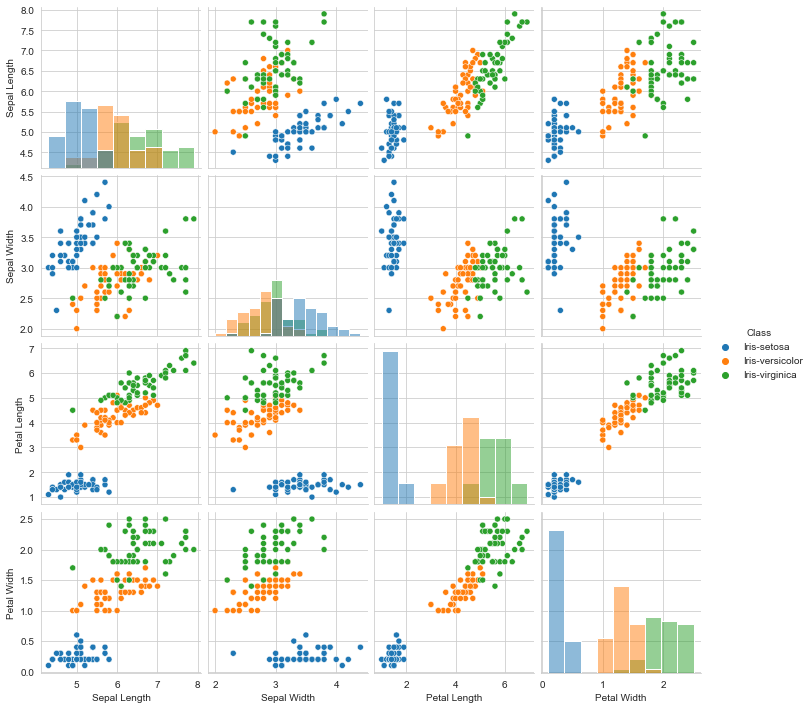

In [31]:
# Show the pairplot for the dataset
sns.set_style("whitegrid")                                      # Set Seaborn plot style to whitegrid
pp = sns.pairplot(iris_df, hue = "Class", diag_kind="hist")     # Create pairplot of the 4 numerical fields in the dataset, with a forced histogram on the diagonal
plt.show()                                                      # Show pairplot

#### Step 1:
The first step is to create an array containing (values_ar) the data in the data set except the "Class" data. This is because it does not contain any numerical data that can be used for the clustering, but does contain the actual clusters we are trying to establish. 

In [32]:
# Step 1
values_ar = iris_df[iris_df.columns[0:4]]                       # Create an array of the dataframes values only

#### Step 2:
As we can see in the data above, there are big differences between the minimum and maximum values of the data set, especially in the petal width (max is 25 times min), and petal length (max is 6.9 times min) categories. In Step 2 we attempt to scale and standardise the data, to reduce the impact of these fairly large differences <a href = https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/>(Brownlee, 2020)</a>. The two methods that we will attempt are the StandardScaler and MinMaxScaler. The StandardScaler removes the mean from the data, and divides it by the standard deviation, producing a standardised data set <a href = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html> (scikit-learn.org, 2020)</a>. The MinMaxScaler transforms every value into a new value between 0 and 1, based on the minimum (which will become 0) and maximum (which will become 1) values in the dataset <a href = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html>(scikit-learn.org, 2020)</a>.

We will use the above to see which scaling method on the values_ar to create two new arrays (scaler_ar and minmax_ar), which will be used to determine which methods leaves most of the variance associated with the data set <a href = https://365datascience.com/pca-k-means/>(365DataScience.com, 2020)</a>.

In [33]:
# Step 2
# Normalize the numeric features so they're on the same scale
scaled_ar = StandardScaler().fit_transform(values_ar)           # Use the StandardScaler feature to create a normalised array of the values in the dataset
minmax_ar = MinMaxScaler().fit_transform(values_ar)             # Use the MinMaxScaler feature to create a normalised array of the values in the dataset

#### Step 3:
It is very difficult to plot or otherwise show the 4 dimensions of the Iris data set, namely the sepal widths and lengths, and the petal widths and lengths, on a 2-D plane. In order to be able to make an attempt at representing the data on a 2-D plane, it is necessary to reduce the 4 dimensions down to 2 to 3 dimensions (365DataScience.com, 2020). This is done through a technique called PCA or Principal Components Analysis. PCA can be described as a statistical approach to reducing multiple or high dimensional data down to a lower or smaller number of dimensions <a href = http://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf> (Ding & He)</a>. It does this through attempting to find the “subspace” of data that best explains the variations in the data set <a href = https://arxiv.org/pdf/1807.04518.pdf> (Feldman, et al., 2013)</a>. In Python, we use PCA(), and can fit the scaled and minmax arrays against the PCA to determine which method removed the least of the variance in the data set.

In [34]:
# Step 3
# Use Principal Components Analysis to reduce the number of dimensions
pca = PCA()                                                     # Set PCA variable 1
pca_2 = PCA()                                                   # Set PCA variable 2
pca.fit(scaled_ar)                                              # Use the PCA fit on the scaled array of values
pca_2.fit(minmax_ar)                                            # Use the PCA fit on the minmax array of values

PCA()

The PCA reduction will produce an array for each of the two scaling methods, and show where the main variances occur. It is probably easier to understand if the data is plotted. 

Scaled: [0.72770452 0.95800975 0.99484807 1.        ]
MinMax: [0.84141901 0.95874375 0.99364939 1.        ]


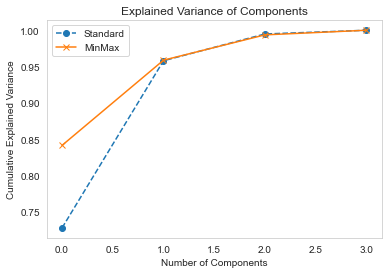

In [35]:
# See how many dimensions we want to keep
# Text based review
print("Scaled:", pca.explained_variance_ratio_.cumsum())        # Print the cumulative variance ratios for the PCA scaled array
print("MinMax:", pca_2.explained_variance_ratio_.cumsum())      # Print the cumulative variance ratios for the PCA minmax array

# Graphical review
plt.plot(range(0, 4), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")   # Plot the cumulative variance ratios for the PCA scaled array on the graph
plt.plot(range(0, 4), pca_2.explained_variance_ratio_.cumsum(), marker = "x", linestyle = "-")  # Plot the cumulative variance ratios for the PCA minmax array on the graph
plt.legend(["Standard", "MinMax"])                              # Show the legend on the graph
plt.title("Explained Variance of Components")                   # Show the title of the graph
plt.xlabel("Number of Components")                              # Show the name of the x-axis
plt.ylabel("Cumulative Explained Variance")                     # Show the name of the y-axis
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.show()                                                      # Show thw graph

#### Step 4:
Based on the above data, it is clear that approximately 95.8% of the variance in the Iris data set can be explained by 2 components. As such, we can reduce the data to just two components from the 4 originally provided. This is done by using PCA to create a scaled 2D array.

In [36]:
# Get two principal components
pca = PCA(n_components=2).fit(minmax_ar)                        # Set the number of components/variables being captured to 2
minmax_2d = pca.transform(minmax_ar)                            # Create a 2d matrix from the components/variables

#### Step 5:
In order to determine the number of clusters that will be set for the k-means algorithm. The easiest way to do this is to use the sum of squared distances (SSE) <a href = https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2> (Kavyazin, 2019)</a>. This method determines the sum of the squares of the distances between the points and the centroid. The object is to get the lowest possible distance between the clusters and the data points, while having the smallest number of clusters (Sharma, 2019).


To do this, we run through multiple iterations of the SSE approach, with an increasing number of clusters. This can be plotted, and where there is a pronounced turn, or elbow on the graph is the ideal number of clusters to use.

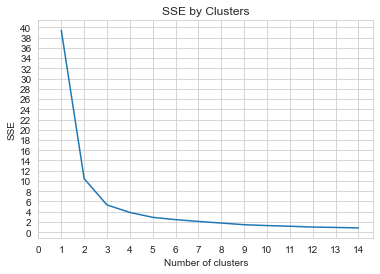

In [37]:
# Create 11 models with 1 to 15 clusters
sse = []                                                        # Create Within Cluster Sum of Squares array
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i)                             # k-means clusters incrementing in steps of 1
    kmeans.fit(minmax_2d)                                       # Fit the data points
    sse.append(kmeans.inertia_)                                 # Get the sse (inertia) value
    
# Plot the SSE values onto a line graph
plt.plot(range(1, 15), sse)                                     # Set a plot with a range from 1 to 15, and plot the SSE values
plt.title("SSE by Clusters")                                    # Set the title
plt.xlabel("Number of clusters")                                # Set the x axis label
plt.ylabel("SSE")                                               # Set the y asix label
plt.xticks(np.arange(0, 15, step = 1))                          # Force all the xticks to be visible
plt.yticks(np.arange(0, 42, step = 2))                          # Force all the xticks to be visible
plt.show()                                                      # Show the plot

From the above, the “elbow” seems to happen at 3 clusters. This can be confirmed by printing out the “SSE” array. This shows the biggest drops in the SSE occur in the 1 – 2, and 2 – 3 clusters (39.4 to 5.31). 

In [38]:
print(sse)                                                      # Print out the SSE

[39.440965262627884, 10.448235406968502, 5.3133547919773525, 3.8553303689481546, 2.89559882225192, 2.444464211171366, 2.092155430548913, 1.7825591355046222, 1.4534317929223022, 1.2869068915096873, 1.1571893631227614, 0.996745308262088, 0.9199454820473808, 0.8281798518429213]


#### Step 6:
We can now use the k-means approach, using 3 clusters. For each point, the system tries to identify to which cluster the point belongs. This approach will return an array with possible values of 0, 1, or 2. The points are now recorded as:

In [39]:
# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init="k-means++", random_state = 10)   # Create a k-means model based on 3 clusters, and a random starting state of 10
km_clusters = model.fit_predict(minmax_ar)                      # Fit the model to the data, and determine the clusters for each data point

print(km_clusters)                                              # Print the cluster for each data point

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### Step 7:
For each point we can plot the points to see to which cluster they have been assigned. This can be done by passing each of the points through a function to plot them, as follows:

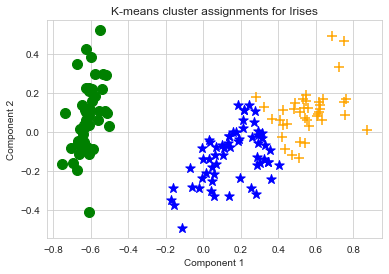

In [40]:
def plot_clusters(samples, clusters):                           # Function to plot the clusters
    col_dic = {0:"blue",1:"green",2:"orange"}                   # Colour dictionary for the the nodes
    mrk_dic = {0:"*",1:"o",2:"+"}                               # Shape dictionary for the different nodes
    colors = [col_dic[x] for x in clusters]                     # Set the colours for each data point
    markers = [mrk_dic[x] for x in clusters]                    # Set the shape for each data point
    for sample in range(len(clusters)):                         # For each data point                    
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)  # PLot the scatter graph using the colours, and markers for the cluster
    plt.xlabel("Component 1")                                   # Set the label for the x axis
    plt.ylabel("Component 2")                                   # Set the label for the y axis
    plt.title("K-means cluster assignments for Irises")         # Set the title of the plot   
    plt.show()                                                  # Show the plot

plot_clusters(minmax_2d, km_clusters)                           # Call the function to plot the clusters

#### Review:
A final review can be conducted to check the accuracy of the results. The easiest way is to map the values, determined by the k-means algorithm, against the initial Iris data set. After dropping all but the “Class” columns, we can use a* groupby* to check the assigned values against the actual class. This will also allow us to count the number of points assigned to the correct/incorrect cluster.

In [41]:
iris_pca_kmeans_df = pd.concat([iris_df.reset_index(drop = True), pd.DataFrame(km_clusters)], axis = 1)   # Create a new dataframe encompassing the original data and the new k-means cluster information
iris_pca_kmeans_df.columns.values[-1:] = ["Segment k-means PCA"]    # Label the k-means column data
iris_pca_kmeans_df["Number"] = ""                               # Introduce a new blank column in the dataframe
iris_pca_kmeans_df.drop(columns = ["Sepal Width", "Sepal Length", "Petal Width", "Petal Length"], inplace = True)   # Drop a number of the columns
iris_pca_kmeans_df = iris_pca_kmeans_df.groupby(["Class", "Segment k-means PCA"]).agg("count")  # Group by the class and k-means cluster information

print(iris_pca_kmeans_df)                                       # Print the grouped by dataframe

                                     Number
Class           Segment k-means PCA        
Iris-setosa     1                        50
Iris-versicolor 0                        47
                2                         3
Iris-virginica  0                        14
                2                        36


From the above, it is clear that the Iris-Setosa (cluster = 1) the k-means algorithm correctly identified them all. This was to be expected as the Iris-Setosa points, and the cluster, is a fairly distinct and homogenous group, with no overlap with the other Iris types.

However, the k-means algorithm misidentified 2 Iris-Versicolor (cluster = 0), and 14 Iris-Virginica (cluster = 2) data points. This is due to there being a crossover in the two Iris types. This results in the data points being cluster to the incorrect cluster. A plotting of the original data set, with overlaid clusters, shows this overlap. This overlap occurs in all data set pairplots.

It should be noted that in all cases, the k-means algorithm correctly identifies that there are 50 data points for each cluster. This is due to the fact that the k-means clustering assumes that the clusters are evenly sized (Garbade, 2018).

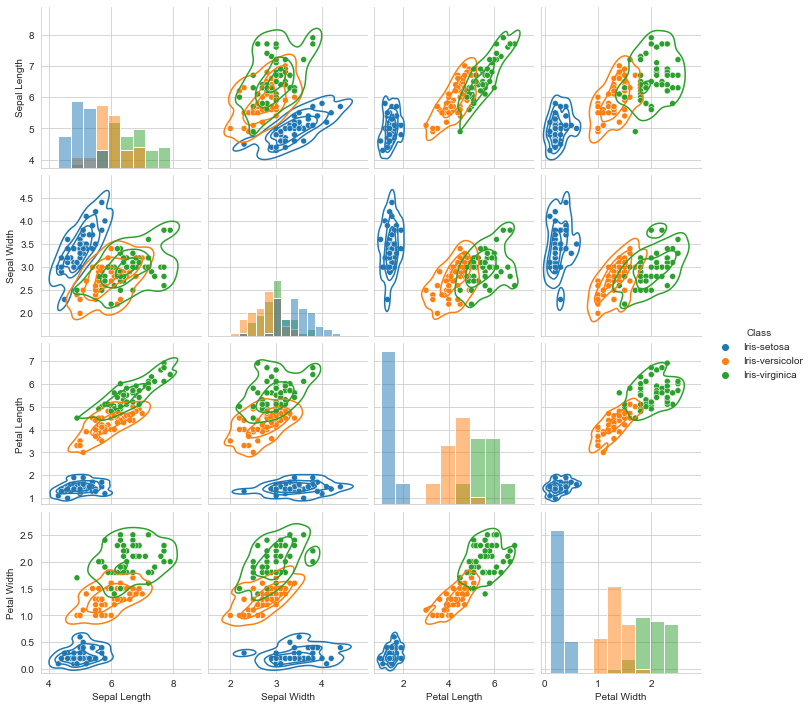

In [42]:
# Show the pairplot for the dataset
sns.set_style("whitegrid")                                      # Set Seaborn plot style to whitegrid
pp = sns.pairplot(iris_df, hue = "Class", diag_kind="hist")     # Create pairplot of the 4 numerical fields in the dataset, with a forced histogram on the diagonal
pp.map_lower(sns.kdeplot, levels = 4, color = "0.2")            # Overlay the lower pairplots with kernel density estimate plots
pp.map_upper(sns.kdeplot, levels = 4, color = "0.2")            # Overlay the upper pairplots with kernel density estimate plots
plt.show()                                                      # Show pairplot

### Predictions
As can be seen in the above, the k-means algorithm identifies three distinct clusters for the Iris data set. This identification would allow somebody to input the 4 original data values (sepal length and width, and petal length and width) into the clustering algorithm. The data point should then be clustered correctly allowing for the identification of the type of Iris.


This approach would work very well for Iris-Setosa, as there is no overlap between them and other Iris types. For Iris-Versicolor or Iris-Virginica, the identification of the flower would depend on the location it is clustered in. Where the data points put the flower between the two centroids, there is a chance of misidentification of the flower. However, where the data point is not between the two centroids, the k-means algorithm should correctly identify the flower through clustering.

### Conclusion
As we can see, k-means clustering is a very useful approach for clustering data. It is reasonably quick, and gives fairly accurate results when there is reasonably clear delimitation between the clusters. However, it falls down somewhat when there is an overlap in the data points belonging to different clusters. This can cause the data points to be cluster incorrectly, which can, in turn, cause issues with subsequent analysis. 

Additionally, the assumption that k-means uses, of all the data points being equally divided among the relevant number of clusters, could lead to issues. This would be very true when the data is not evenly divisible by the number of clusters, or is deliberately different (such as having only 40 in one cluster, and 2 clusters of 60).

Overall, the k-means clustering approach is a useful, and quite cheap way to identify clusters. However, its drawbacks mean that it should not be relied upon to be the sole analysis technique used to identify data sets correctly.


## Bibliography for task 4


* 365DataScience.com, 2020. How to Combine PCA and K-means Clustering in Python?. [Online] 
Available at: https://365datascience.com/pca-k-means/
[Accessed 14 December 2020].


* 365DataScience.com, 2020. What Is Principal Components Analysis?. [Online] 
Available at: https://365datascience.com/principal-components-analysis/
[Accessed 14 December 2020].


* Arvai, K., 2020. K-Means Clustering in Python: A Practical Guide. [Online] 
Available at: https://realpython.com/k-means-clustering-python/
[Accessed 14 December 2020].


* Brownlee, J., 2020. How to Use StandardScaler and MinMaxScaler Transforms in Python. [Online] 
Available at: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
[Accessed 14 December 2020].


* Ding, C. & He, X., n.d. K-means Clustering via Principal Component Analysis. [Online] 
Available at: http://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf
[Accessed 14 December 2020].


* Feldman, D., Schmidt, M. & Sohler, C., 2013. Turning Big Data into Tiny Data: Constant-size Coresets for k-means, PCA and Projective Clustering. Proc. of the 24th SODA,, pp. 1434 - 1453.


* Garbade, M. J., 2018. Understanding K-means Clustering in Machine Learning. [Online] 
Available at: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
[Accessed 14 December 2020].


* Geeks for Geeks, 2020. K means Clustering – Introduction. [Online] 
Available at: https://www.geeksforgeeks.org/k-means-clustering-introduction/
[Accessed 14 December 2020].


* Kappmeier, J.-P. W., Schmidt, D. R. & Schmidt, M., 2015. Solving k-means on High-dimensional Big Data. [Online] 
Available at: https://arxiv.org/pdf/1502.04265.pdf
[Accessed 14 December 2020].


* Kavyazin, D., 2019. Principal Component Analysis and k-means Clustering to Visualize a High Dimensional Dataset. [Online] 
Available at: https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
[Accessed 14 December 2020].


* Leela, V., Priya, K. S. & Manikandan, R., 2013. A COMPARATIVE ANALYSIS BETWEEN K-MEAN AND Y-MEANS ALGORITHMS IN FISHER’S IRIS DATA SETS.. International Journal of Engineering and Technology, 5(1), pp. 245 - 249.


* Piech, C., 2013. K Means. [Online] 
Available at: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
[Accessed 14 December 2020].


* scikit-learn.org, 2020. sklearn.preprocessing.MinMaxScaler. [Online] 
Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
[Accessed 14 December 2020].


* scikit-learn.org, 2020. sklearn.preprocessing.StandardScaler. [Online] 
Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
[Accessed 14 December 2020].


* Sharma, P., 2019. The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need. [Online] 
Available at: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
[Accessed 14 December 2020].


* Trevino, A., 2016. Introduction to K-means Clustering. [Online] 
Available at: https://blogs.oracle.com/datascience/introduction-to-k-means-clustering
[Accessed 14 December 2020].


* Tuldhar, S. K., 2020. K-means and PCA for Image Clustering: a Visual Analysis. [Online] 
Available at: https://towardsdatascience.com/k-means-and-pca-for-image-clustering-a-visual-analysis-8e10d4abba40
[Accessed 14 December 2020].


* Yang, Y., 2013. A study of pattern recognition of Iris flower based on Machine Learning. [Online] 
Available at: https://core.ac.uk/download/pdf/38095118.pdf
[Accessed 14 December 2020].